# $LiOH$ experiments

In [5]:
try:
  import qiskit
  import qiskit_aer
  import qiskit_nature
  import qiskit_ibm_runtime
  import pyscf
  import pylatexenc
except:
  !pip install qiskit qiskit-aer qiskit-ibm-runtime qiskit_nature pyscf pylatexenc

# General imports
import numpy as np

# Qiskit Runtime
from qiskit.primitives import Estimator
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo

# SciPy minimizer routine
from scipy.optimize import minimize

# Plotting functions
import matplotlib.pyplot as plt

# Local imports
from src.moleculemanager import MoleculeManager
from src.helpers import *

In [6]:
# molecule definition
lioh = MoleculeInfo(
  symbols=["Li", "O", "H"],
  coords=([1.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.9691, 0.0, 0.0]),
  multiplicity=1,  # = 2*spin + 1
  charge=0,
)

molecule = MoleculeManager(lioh, "$LiOH$")

Number of particles : (6, 6)
Number of spatial orbitals : 11
Orbital energies : [-20.28793235  -4.58476706  -1.26244192  -0.46638978  -0.45200105
  -0.45200105  -0.04741996   0.26109417   0.26109417   0.32776403
   1.0760341 ]


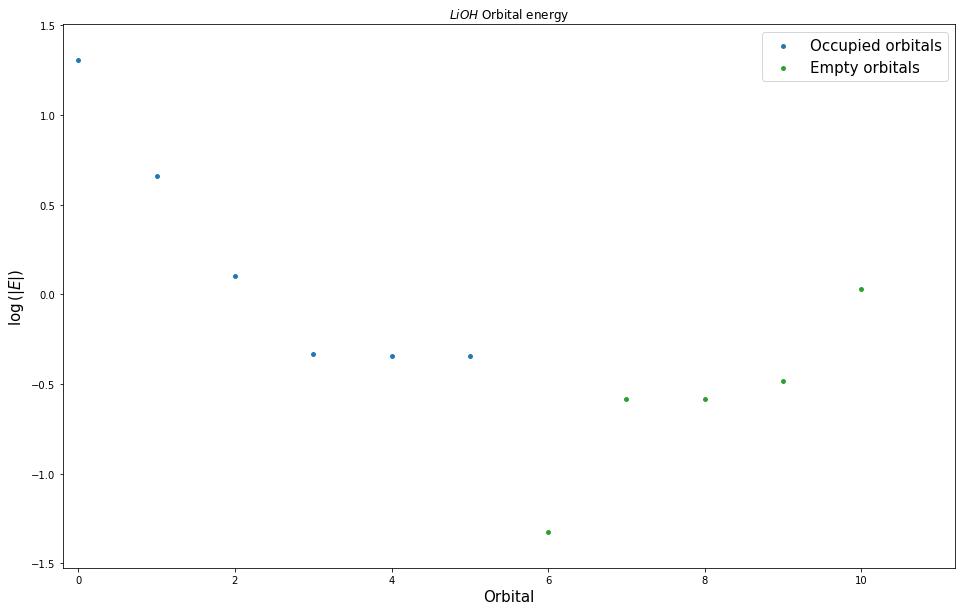

In [7]:
draw_orbitals(molecule.get_problem(), molecule.name)

## We can check which orbitals are removed 'by default'

Number of particles : (4, 4)
Number of spatial orbitals : 9
Orbital energies : [-1.26244192 -0.46638978 -0.45200105 -0.45200105 -0.04741996  0.26109417
  0.26109417  0.32776403  1.0760341 ]


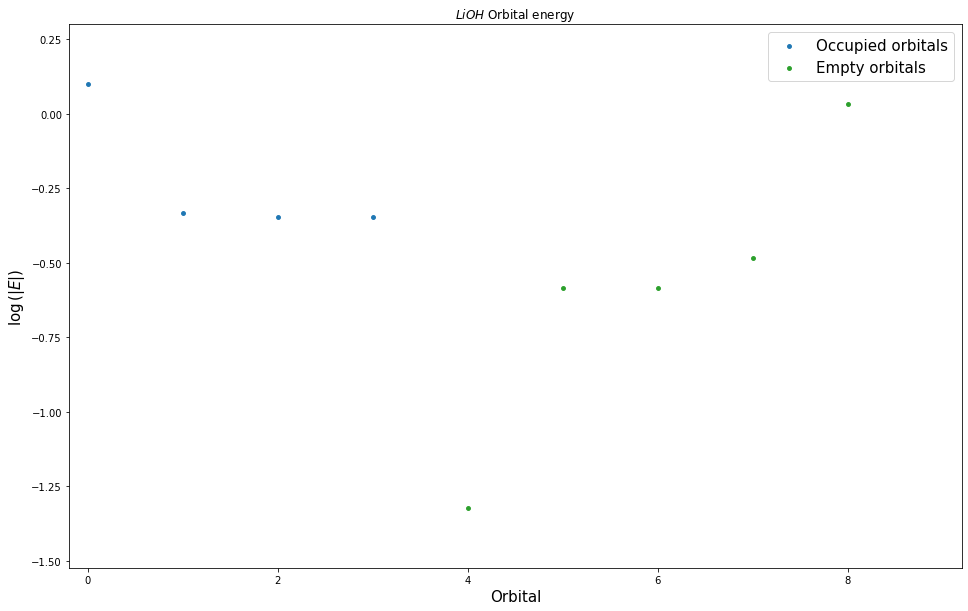

In [8]:
draw_orbitals(get_freezed_problem(molecule.get_problem()), molecule.name)

In [9]:
domain = np.linspace(0.1, 2, 30)

exact_energies = []
vqe_energies = []

for dist in domain:
  print(f'{dist=}')
  molecule.SetAtomCoords(([-dist, 0.0, 0.0], [0.0, 0.0, 0.0], [0.9691, 0.0, 0.0]))
  exact_res, vqe_res = molecule.Experiment(
    optimizer_type=COBYLA(maxiter=15, tol=0.0001),
    orbitals_to_remove=[2, 10]
  )
  exact_energies.append(exact_res.total_energies)
  vqe_energies.append(vqe_res.total_energies)

dist=0.1
20:14:50 FindGroundStateExactSolver started.


Exact result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -134.688366182844
  - computed part:      -15.472109621139
  - FreezeCoreTransformer extracted energy part: -119.216256561705
~ Nuclear repulsion energy (Hartree): 132.855855332084
> Total ground state energy (Hartree): -1.832510850761
 
=== MEASURED OBSERVABLES ===
 
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [1.26441575  0.0  0.0]
 
20:14:56 FindGroundStateExactSolver done.
20:14:56 FindGroundStateVQE started.
20:15:04 ansatz initialized
ansatz.depth = 1
num of qubits = 12
20:15:35 VQE compute_minimum_eigenvalue done
VQE result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -134.626543623016
  - computed part:      -15.410287061311
  - FreezeCoreTransformer extracted energy part: -119.216256561705
~ Nuclear repulsion energy (Hartree): 132.855855332084
> Total ground state energy (Hartree): -1.770688290933
 
=== MEASURED OBSERVABLES ===
 
 
=== DIPOLE MOM

## Plot comparison between VQE and ExactSolver

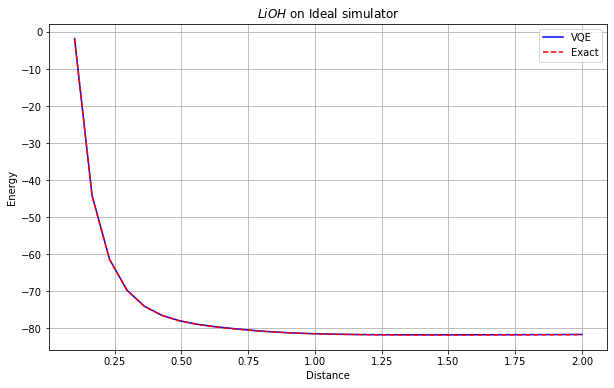

In [10]:
plot_comparisons(
  data=[vqe_energies, exact_energies],
  labels=['VQE', 'Exact'],
  domain=domain,
  colors=['blue', 'red'],
  linestyles=['solid', '--'],
  title=f'{molecule.name} on Ideal simulator'
)

## Plot VQE error

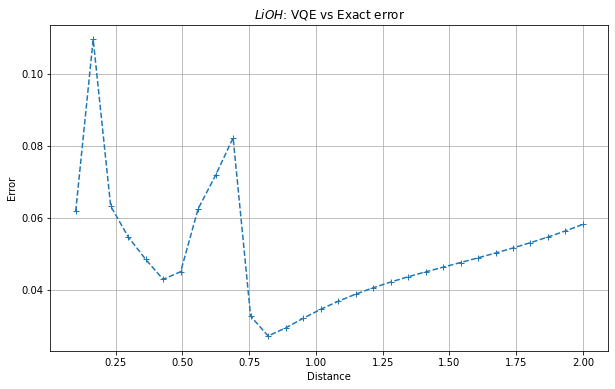

In [11]:
plot_error(
  vals_1=exact_energies,
  vals_2=vqe_energies,
  domain=domain,
  title=f'{molecule.name}: VQE vs Exact error'
)

Set's look closer...

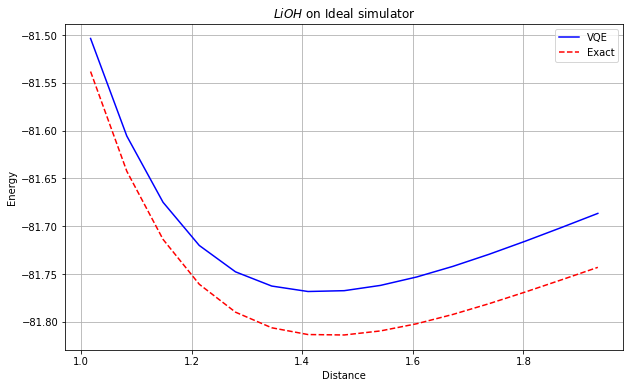

In [12]:
plot_comparisons(
  data=[vqe_energies, exact_energies],
  labels=['VQE', 'Exact'],
  domain=domain,
  colors=['blue', 'red'],
  linestyles=['solid', '--'],
  title=f'{molecule.name} on Ideal simulator',
  lower_bound=1,
  upper_bound=2
)

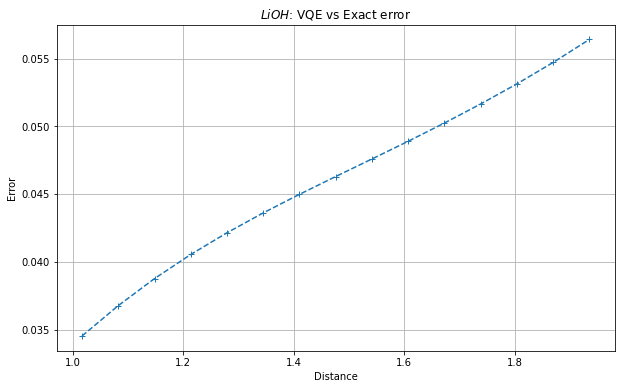

In [13]:
plot_error(
  vals_1=exact_energies,
  vals_2=vqe_energies,
  domain=domain,
  title=f'{molecule.name}: VQE vs Exact error',
  lower_bound=1,
  upper_bound=2
)

## Run on noisy simulator

We have to remove more orbitals due to computational issues.

In [15]:
noisy_domain = np.linspace(1, 2, 10)

noisy_vqe_energies = []
noisy_exact_energies = []

for dist in noisy_domain:
  print(f'{dist=}')
  molecule.SetAtomCoords(([-dist, 0.0, 0.0], [0.0, 0.0, 0.0], [0.9691, 0.0, 0.0]))
  exact_res, vqe_res = molecule.Experiment(
    optimizer_type=COBYLA(maxiter=10, tol=0.0001),
    noisy_mode=True,
    orbitals_to_remove=[2, 3, 9, 10]
  )
  noisy_vqe_energies.append(vqe_res.total_energies)
  noisy_exact_energies.append(exact_res.total_energies)

dist=1.0
20:56:29 FindGroundStateExactSolver started.
Exact result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -99.377632720543
  - computed part:      -5.648092999617
  - FreezeCoreTransformer extracted energy part: -93.729539720927
~ Nuclear repulsion energy (Hartree): 17.874876294649
> Total ground state energy (Hartree): -81.502756425894
 
=== MEASURED OBSERVABLES ===
 
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [-3.83784479  0.0  0.0]
 
20:56:32 FindGroundStateExactSolver done.
20:56:32 FindGroundStateVQE started.
20:56:36 ansatz initialized
ansatz.depth = 1
num of qubits = 8
21:21:09 VQE compute_minimum_eigenvalue done
VQE result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -97.661572312911
  - computed part:      -3.932032591984
  - FreezeCoreTransformer extracted energy part: -93.729539720927
~ Nuclear repulsion energy (Hartree): 17.874876294649
> Total ground state energy (Hartree): -79.786696018261
 

## Compare VQE on noisy simulator vs Ideal simulator & Exact solver 

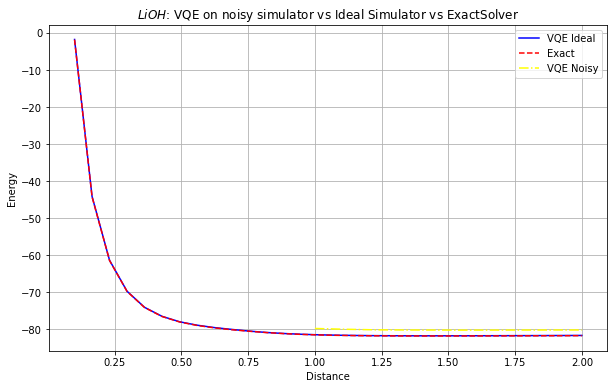

In [16]:
plot_comparisons(
  data=[(vqe_energies, domain), (exact_energies, domain),(noisy_vqe_energies, noisy_domain)],
  labels=['VQE Ideal', 'Exact', 'VQE Noisy'],
  colors=['blue', 'red', 'yellow'],
  linestyles=['solid', '--', 'dashdot'],
  title=f'{molecule.name}: VQE on noisy simulator vs Ideal Simulator vs ExactSolver'
)

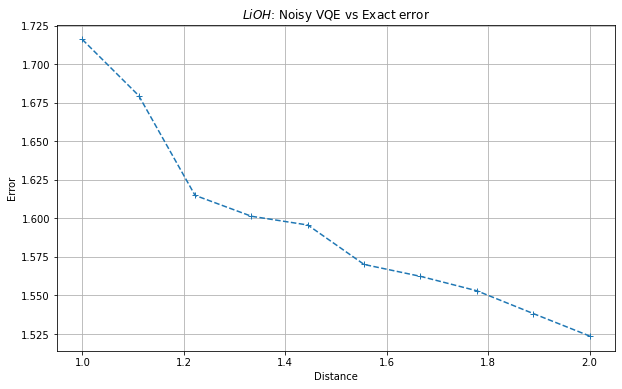

In [17]:
plot_error(
  vals_1=noisy_exact_energies,
  vals_2=noisy_vqe_energies,
  domain=noisy_domain,
  title=f'{molecule.name}: Noisy VQE vs Exact error'
)